<a href="https://colab.research.google.com/github/Ayush-07-cmd/Stock_Price_Prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- Microsoft Stock ---
RMSE: 53.78
Predicted Next Close Price: ₹165.20


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


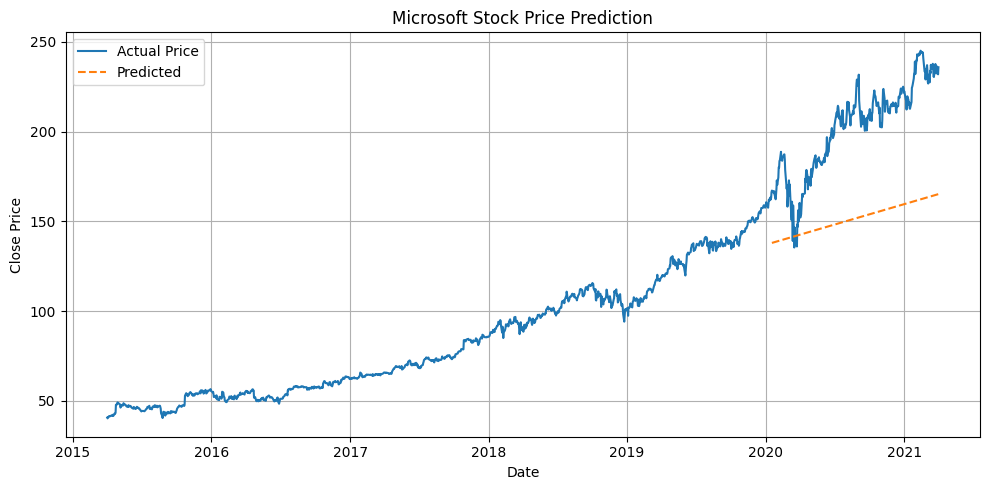


--- Google Stock ---
RMSE: 21.80
Predicted Next Close Price: ₹831.59


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


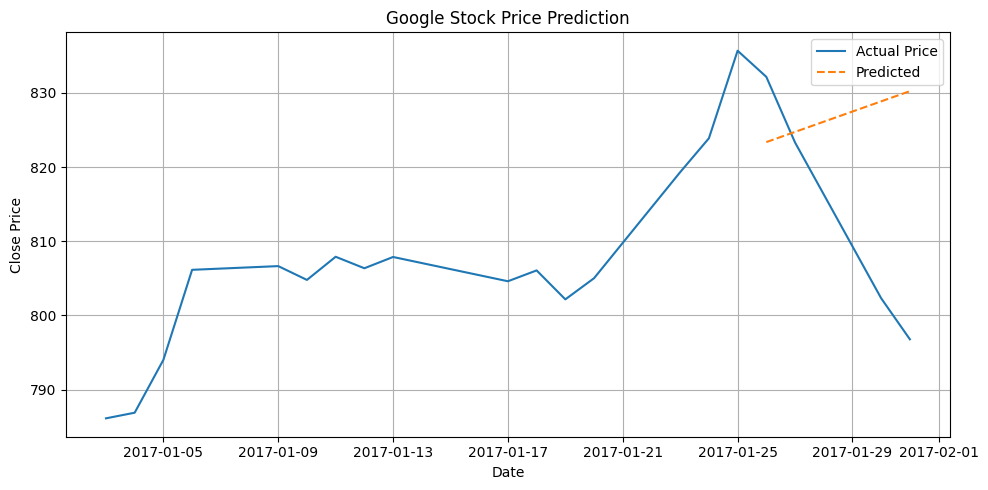


--- Zomato Stock ---
RMSE: 88.03
Predicted Next Close Price: ₹17.33


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


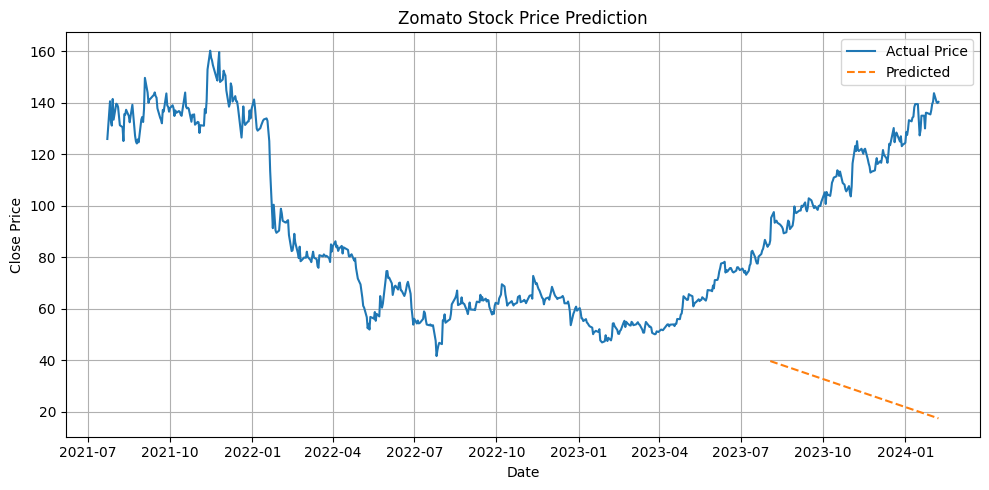

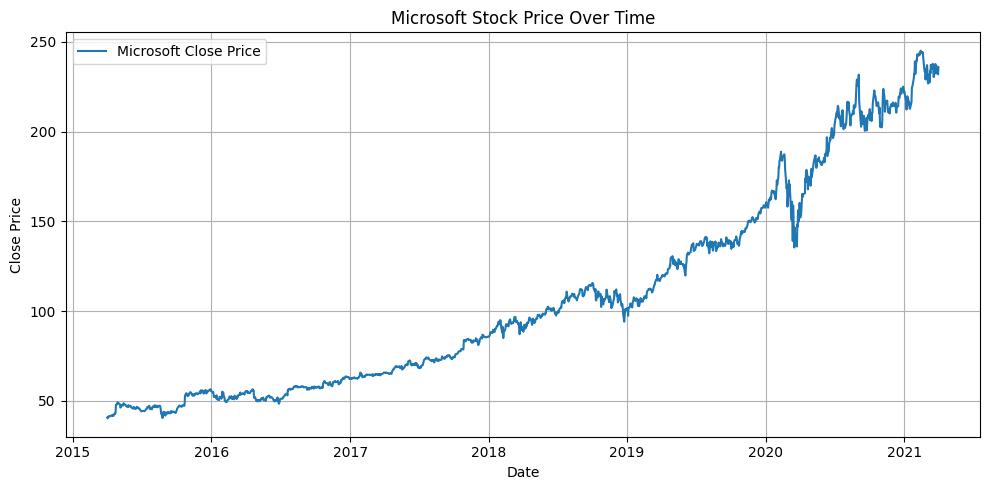

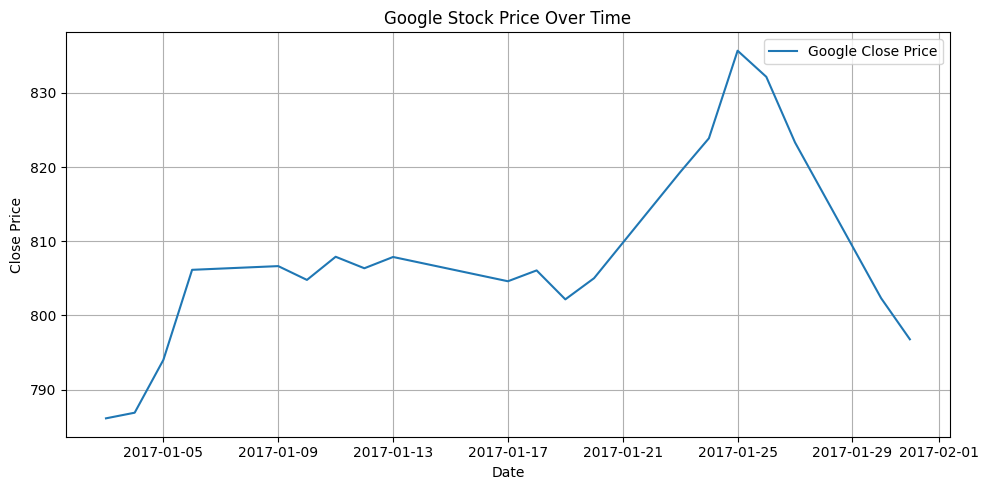

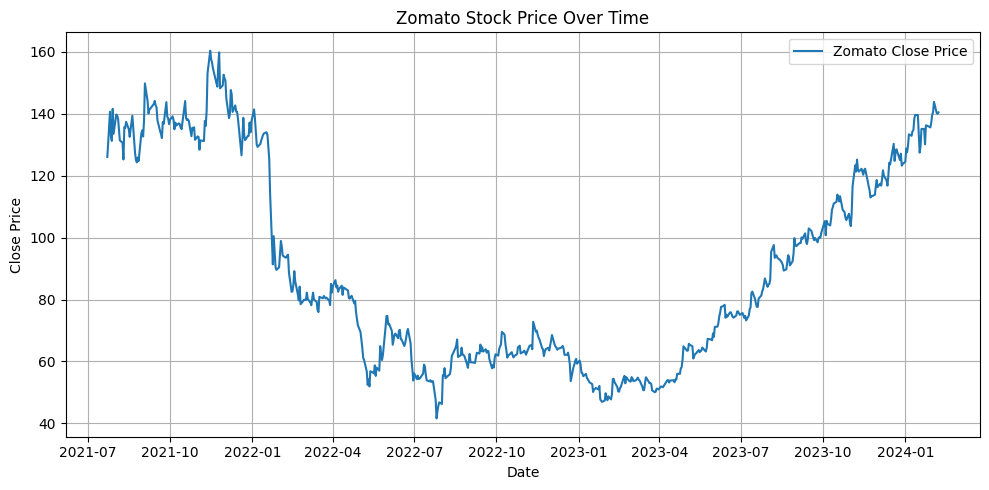

In [8]:

# 📈 Stock Price Prediction & Visualization Project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from datetime import datetime

# ✅ Load CSV files
msft = pd.read_csv("Microsoft_Stock.csv")
goog = pd.read_csv("Google_Stock_Price_Test.csv")
zomato = pd.read_csv("zomato.csv")

# 🧹 Clean Google volume column
goog['Volume'] = goog['Volume'].str.replace(',', '').astype(float)

# 📊 Function to process stock data and predict prices
def process_stock_data(df, stock_name):
    print(f"\n--- {stock_name} Stock ---")

    # Preprocess
    df['Date'] = pd.to_datetime(df['Date'])
    df.sort_values('Date', inplace=True)
    df['Days'] = (df['Date'] - df['Date'].min()).dt.days
    X = df[['Days']]
    y = df['Close'].astype(float)

    # Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    model = LinearRegression()
    model.fit(X_train, y_train)

     # Predict
    y_pred = model.predict(X_test)
    next_day = X['Days'].max() + 1
    next_price = model.predict([[next_day]])[0]

    # Evaluate
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"RMSE: {rmse:.2f}")
    print(f"Predicted Next Close Price: ₹{next_price:.2f}")

    # Plot actual vs predicted
    plt.figure(figsize=(10, 5))
    plt.plot(df['Date'], y, label='Actual Price')
    plt.plot(df.loc[X_test.index, 'Date'], y_pred, label='Predicted', linestyle='--')
    plt.title(f'{stock_name} Stock Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# 🔁 Run predictions for each stock
process_stock_data(msft, "Microsoft")
process_stock_data(goog, "Google")
process_stock_data(zomato, "Zomato")

# 📉 Function to plot stock history only
def plot_stock_history(df, stock_name):
    df['Date'] = pd.to_datetime(df['Date'])
    df.sort_values('Date', inplace=True)
    plt.figure(figsize=(10, 5))
    plt.plot(df['Date'], df['Close'].astype(float), label=f'{stock_name} Close Price')
    plt.title(f'{stock_name} Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 📊 Plot historical prices
plot_stock_history(msft.copy(), "Microsoft")
plot_stock_history(goog.copy(), "Google")
plot_stock_history(zomato.copy(), "Zomato")